<h1 align="center"> Python Essentials: Data Visualization.</h1>

    R Scott Collings
    Math 345 Sec 002
    10 Dec 2018

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as spst
from scipy import special as misc

In [2]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

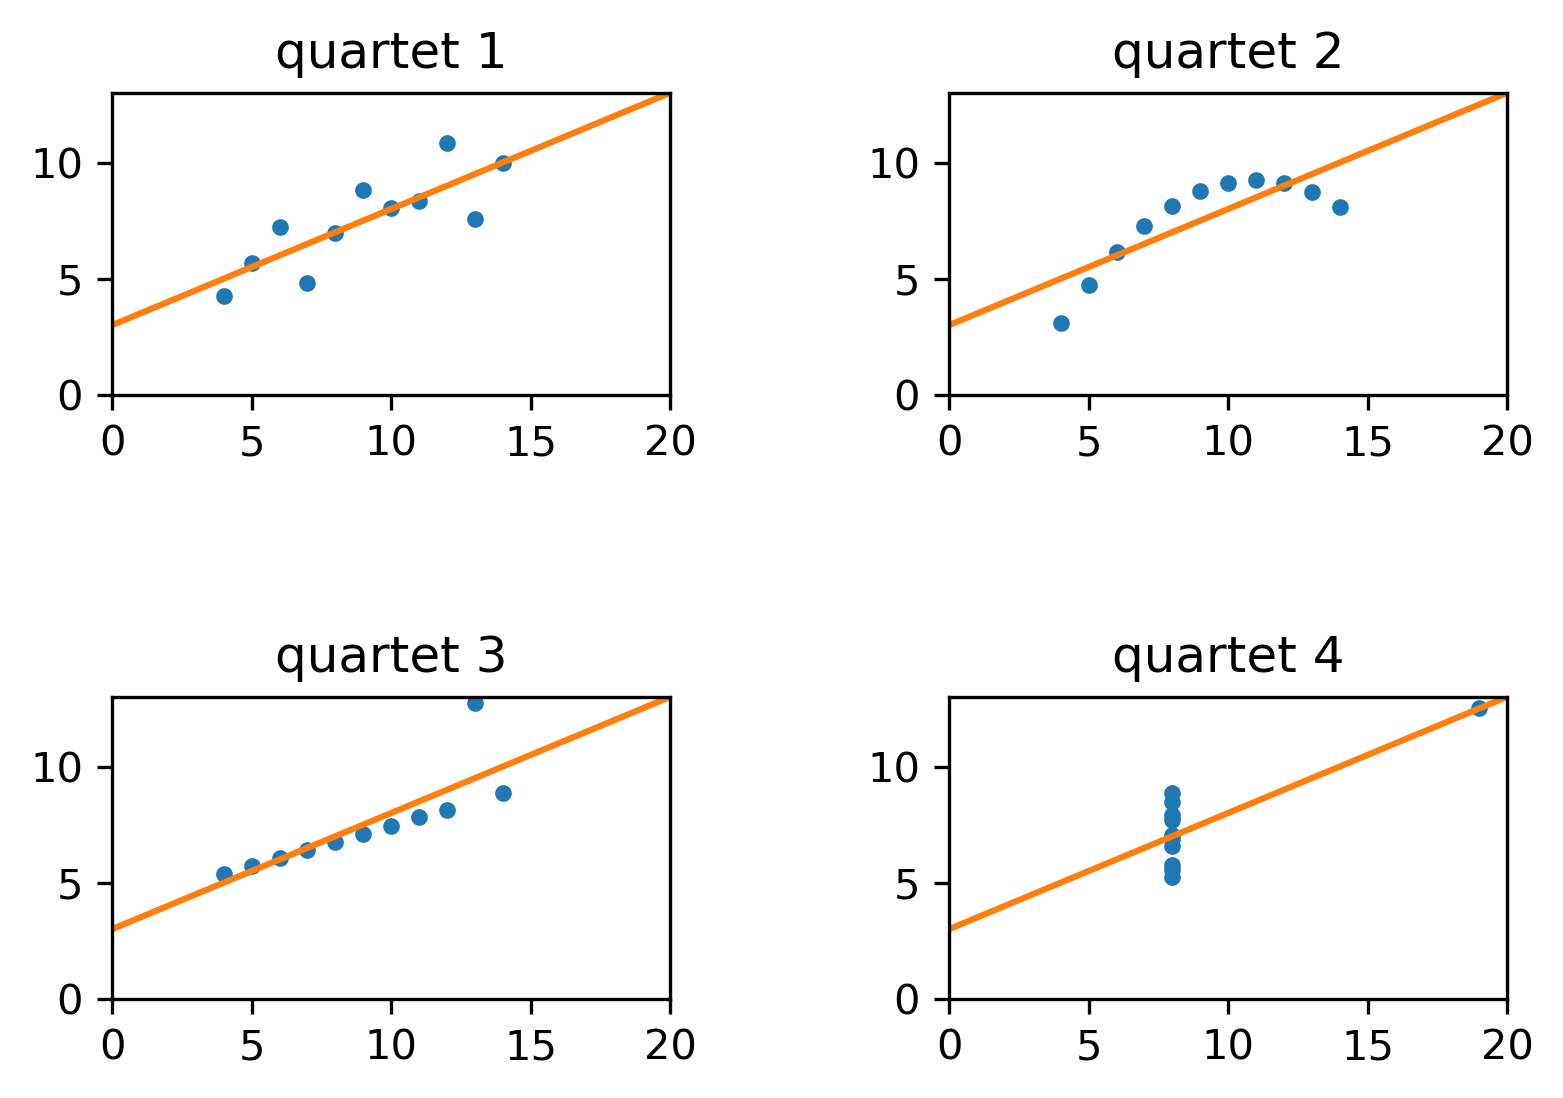

In [3]:
A = np.load("anscombe.npy")
x=np.linspace(0,20,21)
x1=A[:,0]
x2=A[:,2]
x3=A[:,4]
x4=A[:,6]
y1=A[:,1]
y2=A[:,3]
y3=A[:,5]
y4=A[:,7]
linreg1 = spst.linregress(x1,y1)
linreg2 = spst.linregress(x2,y2)
linreg3 = spst.linregress(x3,y3)
linreg4 = spst.linregress(x4,y4)
plt.subplot(221)
plt.plot(x1,y1,'.')
plt.plot(x,linreg1[0] * x + linreg1[1])
plt.ylim(0,13)
plt.xlim(0,20)
plt.gca().set_title('quartet 1')
plt.subplot(222)
plt.plot(x2,y2,'.')
plt.plot(x,linreg2[0] * x + linreg2[1])
plt.ylim(0,13)
plt.xlim(0,20)
plt.gca().set_title('quartet 2')
plt.subplot(223)
plt.plot(x3,y3,'.')
plt.plot(x,linreg3[0] * x + linreg3[1])
plt.ylim(0,13)
plt.xlim(0,20)
plt.gca().set_title('quartet 3')
plt.subplot(224)
plt.plot(x4,y4,'.')
plt.plot(x,linreg4[0] * x + linreg4[1])
plt.ylim(0,13)
plt.xlim(0,20)
plt.gca().set_title('quartet 4')
plt.subplots_adjust(wspace=.5,hspace=1)
plt.show()

In [4]:
print('Quartet 1 Stats')
print('x-mean: ' + str(sum(x1) / len(x1)))
print('y-mean: ' + str(sum(y1) / len(y1)))
print('x-var: ' + str(spst.variation(x1)))
print('y-var: ' + str(spst.variation(y1)))
print('slope: ' + str(linreg1[0]))
print('intercept: ' + str(linreg1[1]))
print('correlation coefficient: ' + str(linreg1[2]))
print('')
print('Quartet 2 Stats')
print('x-mean: ' + str(sum(x2) / len(x2)))
print('y-mean: ' + str(sum(y2) / len(y2)))
print('x-var: ' + str(spst.variation(x2)))
print('y-var: ' + str(spst.variation(y2)))
print('slope: ' + str(linreg2[0]))
print('intercept: ' + str(linreg2[1]))
print('correlation coefficient: ' + str(linreg2[2]))
print('')
print('Quartet 3 Stats')
print('x-mean: ' + str(sum(x3) / len(x3)))
print('y-mean: ' + str(sum(y3) / len(y3)))
print('x-var: ' + str(spst.variation(x3)))
print('y-var: ' + str(spst.variation(y3)))
print('slope: ' + str(linreg3[0]))
print('intercept: ' + str(linreg3[1]))
print('correlation coefficient: ' + str(linreg3[2]))
print('')
print('Quartet 4 Stats')
print('x-mean: ' + str(sum(x4) / len(x4)))
print('y-mean: ' + str(sum(y4) / len(y4)))
print('x-var: ' + str(spst.variation(x4)))
print('y-var: ' + str(spst.variation(y4)))
print('slope: ' + str(linreg4[0]))
print('intercept: ' + str(linreg4[1]))
print('correlation coefficient: ' + str(linreg4[2]))
print('')

Quartet 1 Stats
x-mean: 9.0
y-mean: 7.500909090909093
x-var: 0.35136418446315326
y-var: 0.2582385937001012
slope: 0.5000909090909091
intercept: 3.0000909090909103
correlation coefficient: 0.8164205163448399

Quartet 2 Stats
x-mean: 9.0
y-mean: 7.500909090909091
x-var: 0.35136418446315326
y-var: 0.2582498558524521
slope: 0.5
intercept: 3.00090909090909
correlation coefficient: 0.8162365060002428

Quartet 3 Stats
x-mean: 9.0
y-mean: 7.500000000000001
x-var: 0.35136418446315326
y-var: 0.2581243925323642
slope: 0.4997272727272727
intercept: 3.0024545454545457
correlation coefficient: 0.8162867394895982

Quartet 4 Stats
x-mean: 9.0
y-mean: 7.50090909090909
x-var: 0.35136418446315326
y-var: 0.25811279961792416
slope: 0.4999090909090909
intercept: 3.0017272727272726
correlation coefficient: 0.8165214368885028



<p>The statistics for each quartet are essentially the same and difference might just be due to slight error in calculation. The regressions are the same as well, the only significant difference is the actual points themselves.</p>

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

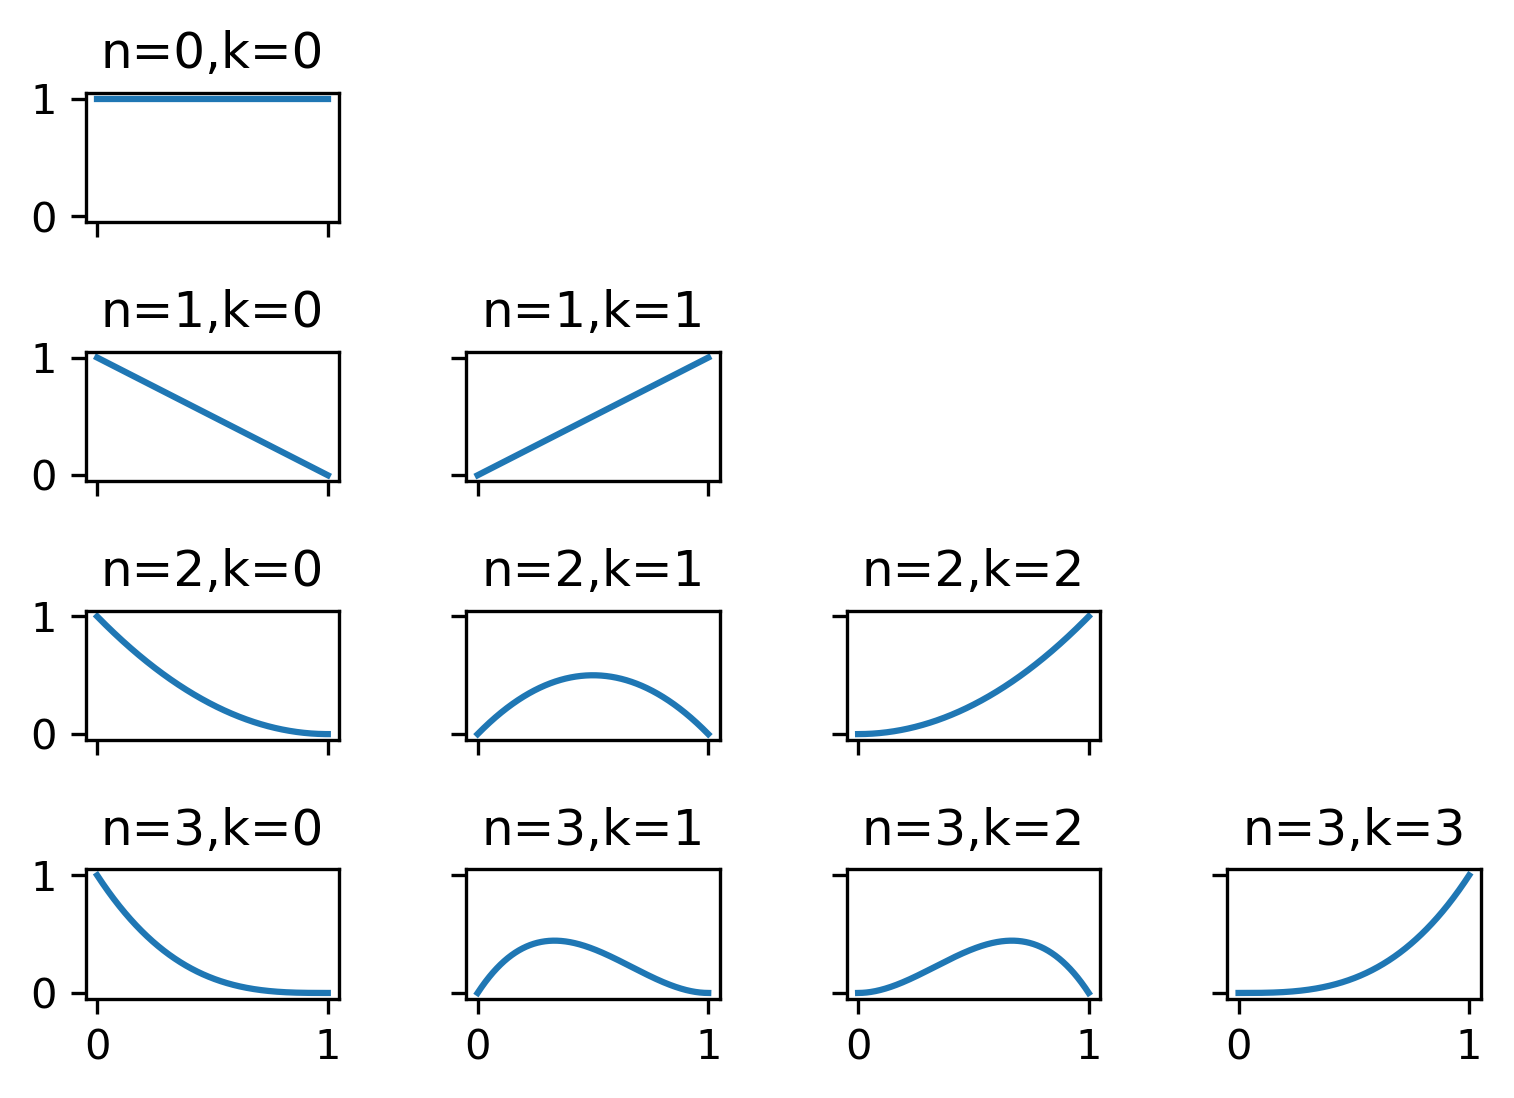

In [5]:
bern = []
x = np.linspace(0,1,1000)
f, axes = plt.subplots(4,4,sharex=True,sharey=True)
for n in [0,1,2,3]:
    k = 0
    while k <= n:
        bern.append(misc.comb(n,k) * (x ** k) * ((1-x) ** (n-k)))
        k += 1
axes[0,0].plot(x,bern[0])
axes[0,0].set_title('n=0,k=0')
axes[0,1].axis('off')
axes[0,2].axis('off')
axes[0,3].axis('off')
axes[1,0].plot(x,bern[1])
axes[1,0].set_title('n=1,k=0')
axes[1,1].plot(x,bern[2])
axes[1,1].set_title('n=1,k=1')
axes[1,2].axis('off')
axes[1,3].axis('off')
axes[2,0].plot(x,bern[3])
axes[2,0].set_title('n=2,k=0')
axes[2,1].plot(x,bern[4])
axes[2,1].set_title('n=2,k=1')
axes[2,2].plot(x,bern[5])
axes[2,2].set_title('n=2,k=2')
axes[2,3].axis('off')
axes[3,0].plot(x,bern[6])
axes[3,0].set_title('n=3,k=0')
axes[3,1].plot(x,bern[7])
axes[3,1].set_title('n=3,k=1')
axes[3,2].plot(x,bern[8])
axes[3,2].set_title('n=3,k=2')
axes[3,3].plot(x,bern[9])
axes[3,3].set_title('n=3,k=3')
plt.subplots_adjust(wspace=.5,hspace=1)

### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

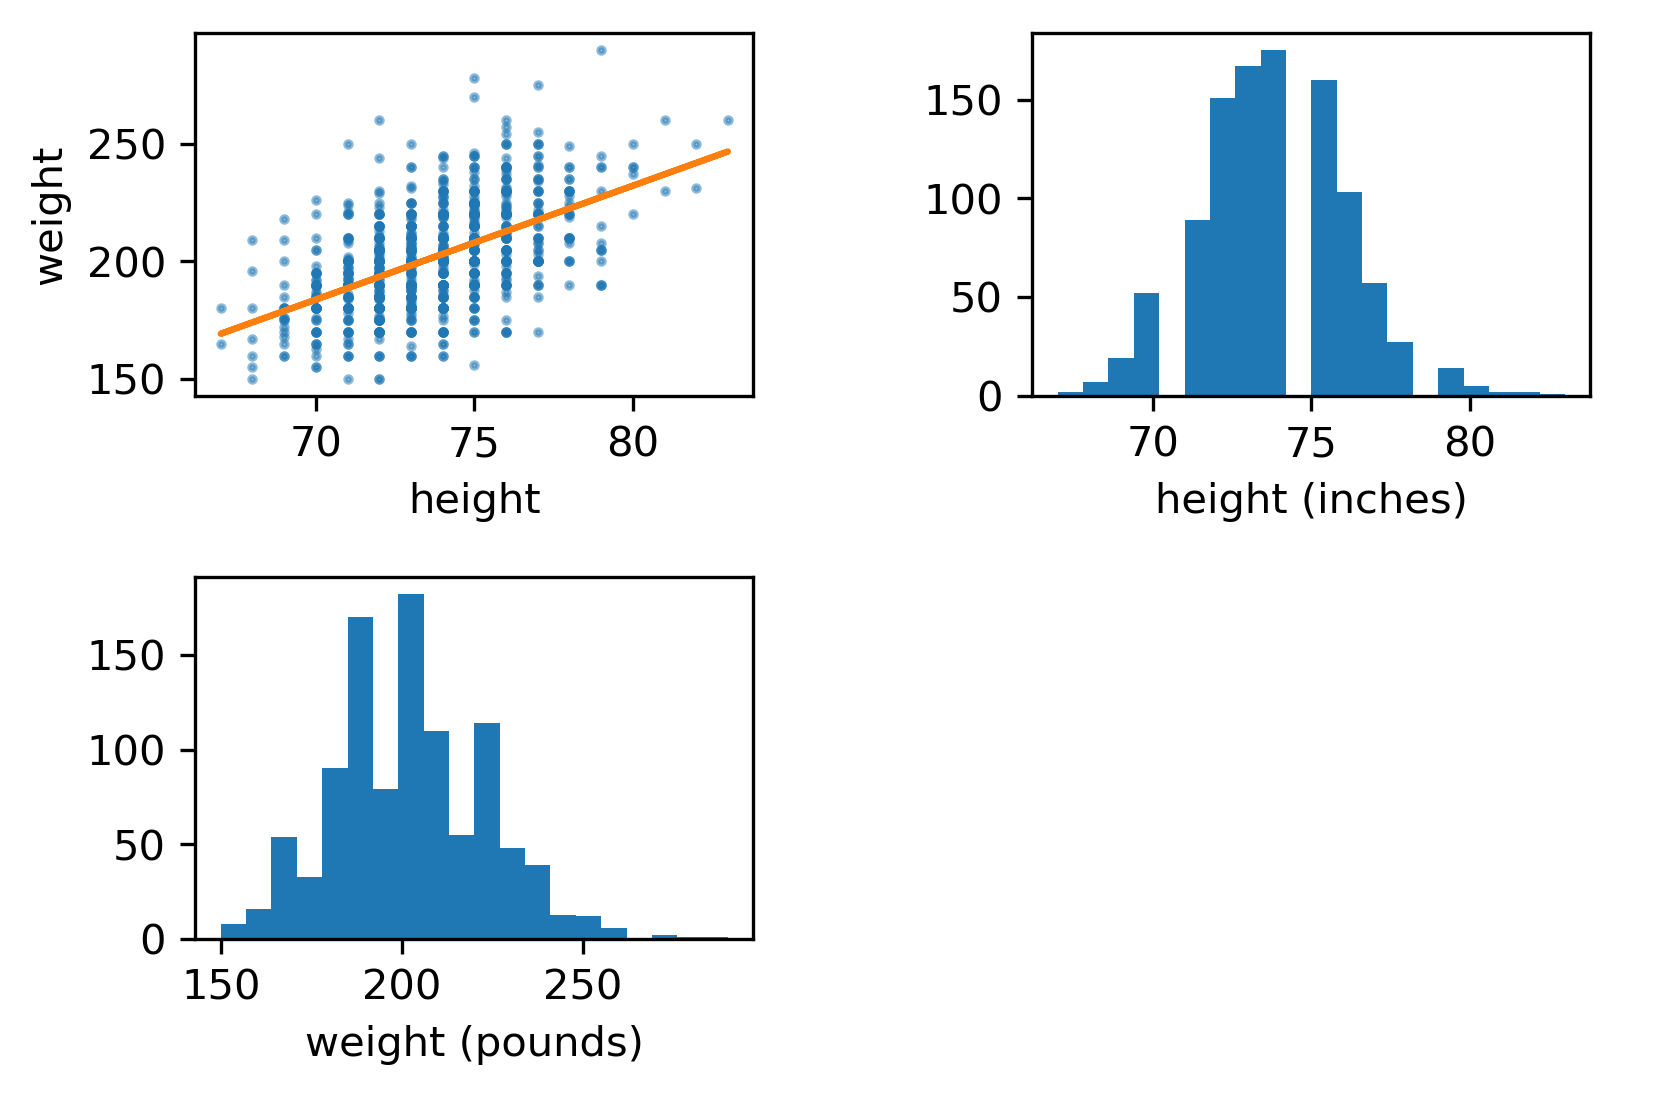

In [6]:
height, weight, age = np.load("MLB.npy").T
linreg = spst.linregress(height,weight)
f, axes = plt.subplots(2,2)
axes[0,0].plot(height,weight,'.',markersize=3,alpha=.5)
axes[0,0].set_xlabel('height')
axes[0,0].set_ylabel('weight')
axes[0,0].plot(height, height * linreg[0] + linreg[1])
axes[0,1].hist(height,bins=20)
axes[0,1].set_xlabel('height (inches)')
axes[1,0].hist(weight,bins=20)
axes[1,0].set_xlabel('weight (pounds)')
axes[1,1].axis('off')
plt.subplots_adjust(wspace=.5,hspace=.5)

### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

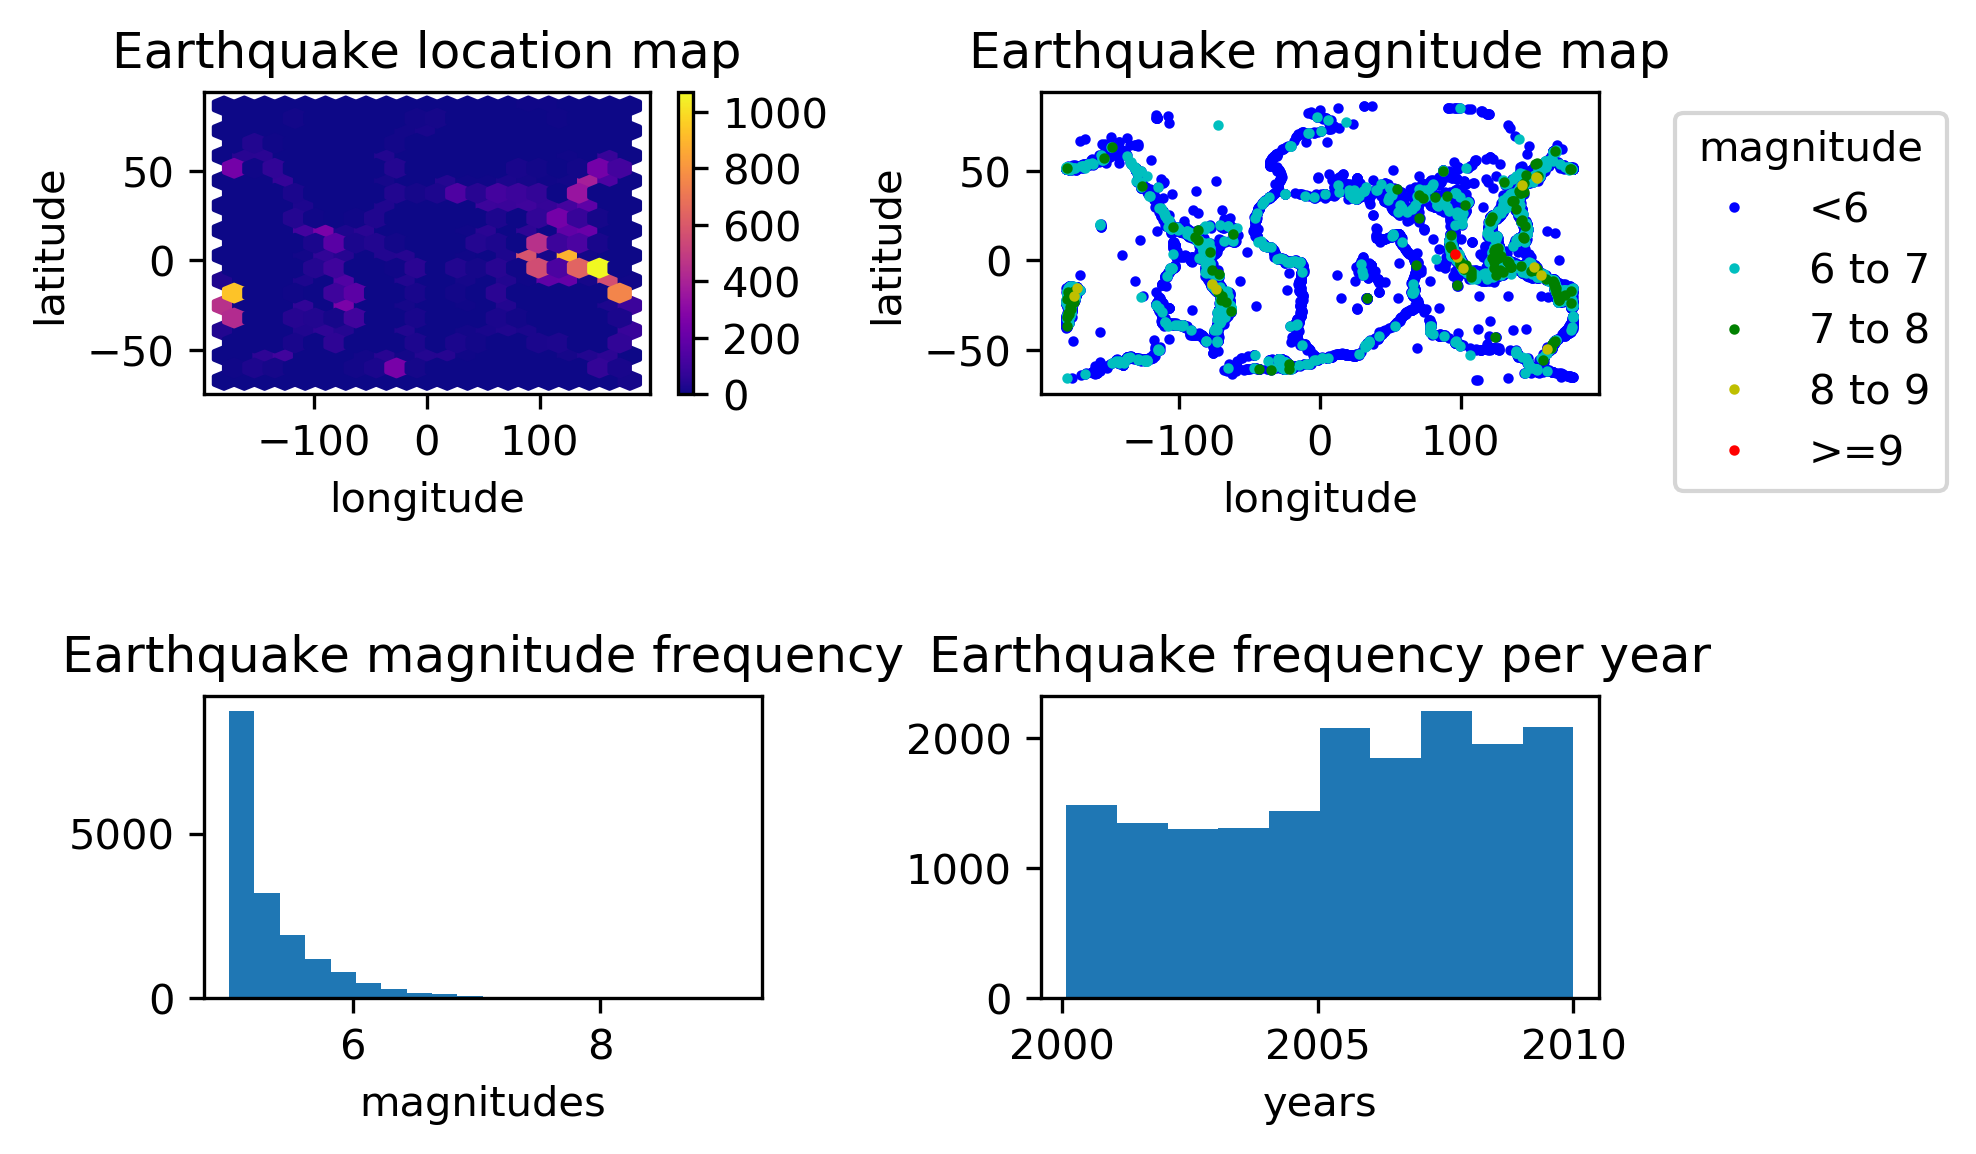

In [80]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T
order1 = np.where((magnitudes < 6))
orderedlongs1 = longitude[order1[0]]
orderedlats1 = latitude[order1[0]]
order2 = np.where((magnitudes < 7) & (magnitudes >=6))
orderedlongs2 = longitude[order2[0]]
orderedlats2 = latitude[order2[0]]
order3 = np.where((magnitudes < 8) & (magnitudes >=7))
orderedlongs3 = longitude[order3[0]]
orderedlats3 = latitude[order3[0]]
order4 = np.where((magnitudes < 9) & (magnitudes >=8))
orderedlongs4 = longitude[order4[0]]
orderedlats4 = latitude[order4[0]]
order5 = np.where(magnitudes >=9)
orderedlongs5 = longitude[order5[0]]
orderedlats5 = latitude[order5[0]]
fig, axes = plt.subplots(2,2)
plot1 = axes[0,0].hexbin(orderedlongs,orderedlats,gridsize=20,cmap='plasma')
axes[0,0].set_ylabel('latitude')
axes[0,0].set_xlabel('longitude')
axes[0,0].set_title('Earthquake location map')
fig.colorbar(plot1,ax=axes[0,0])
axes[0,1].plot(orderedlongs1,orderedlats1,'b.',markersize=3,zorder=1,label='<6')
axes[0,1].plot(orderedlongs2,orderedlats2,'c.',markersize=3,zorder=2,label='6 to 7')
axes[0,1].plot(orderedlongs3,orderedlats3,'g.',markersize=3,zorder=3,label='7 to 8')
axes[0,1].plot(orderedlongs4,orderedlats4,'y.',markersize=3,zorder=4,label='8 to 9')
axes[0,1].plot(orderedlongs5,orderedlats5,'r.',markersize=3,zorder=5,label='>=9')
axes[0,1].legend(title='magnitude',bbox_to_anchor=(1.1,1))
axes[0,1].set_ylabel('latitude')
axes[0,1].set_xlabel('longitude')
axes[0,1].set_title('Earthquake magnitude map')
axes[1,0].hist(magnitudes,bins=20)
axes[1,0].set_xlabel('magnitudes')
axes[1,0].set_title('Earthquake magnitude frequency')
axes[1,1].hist(years,bins=10)
axes[1,1].set_xlabel('years')
axes[1,1].set_title('Earthquake frequency per year')
plt.subplots_adjust(wspace=.5,hspace=1)


### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

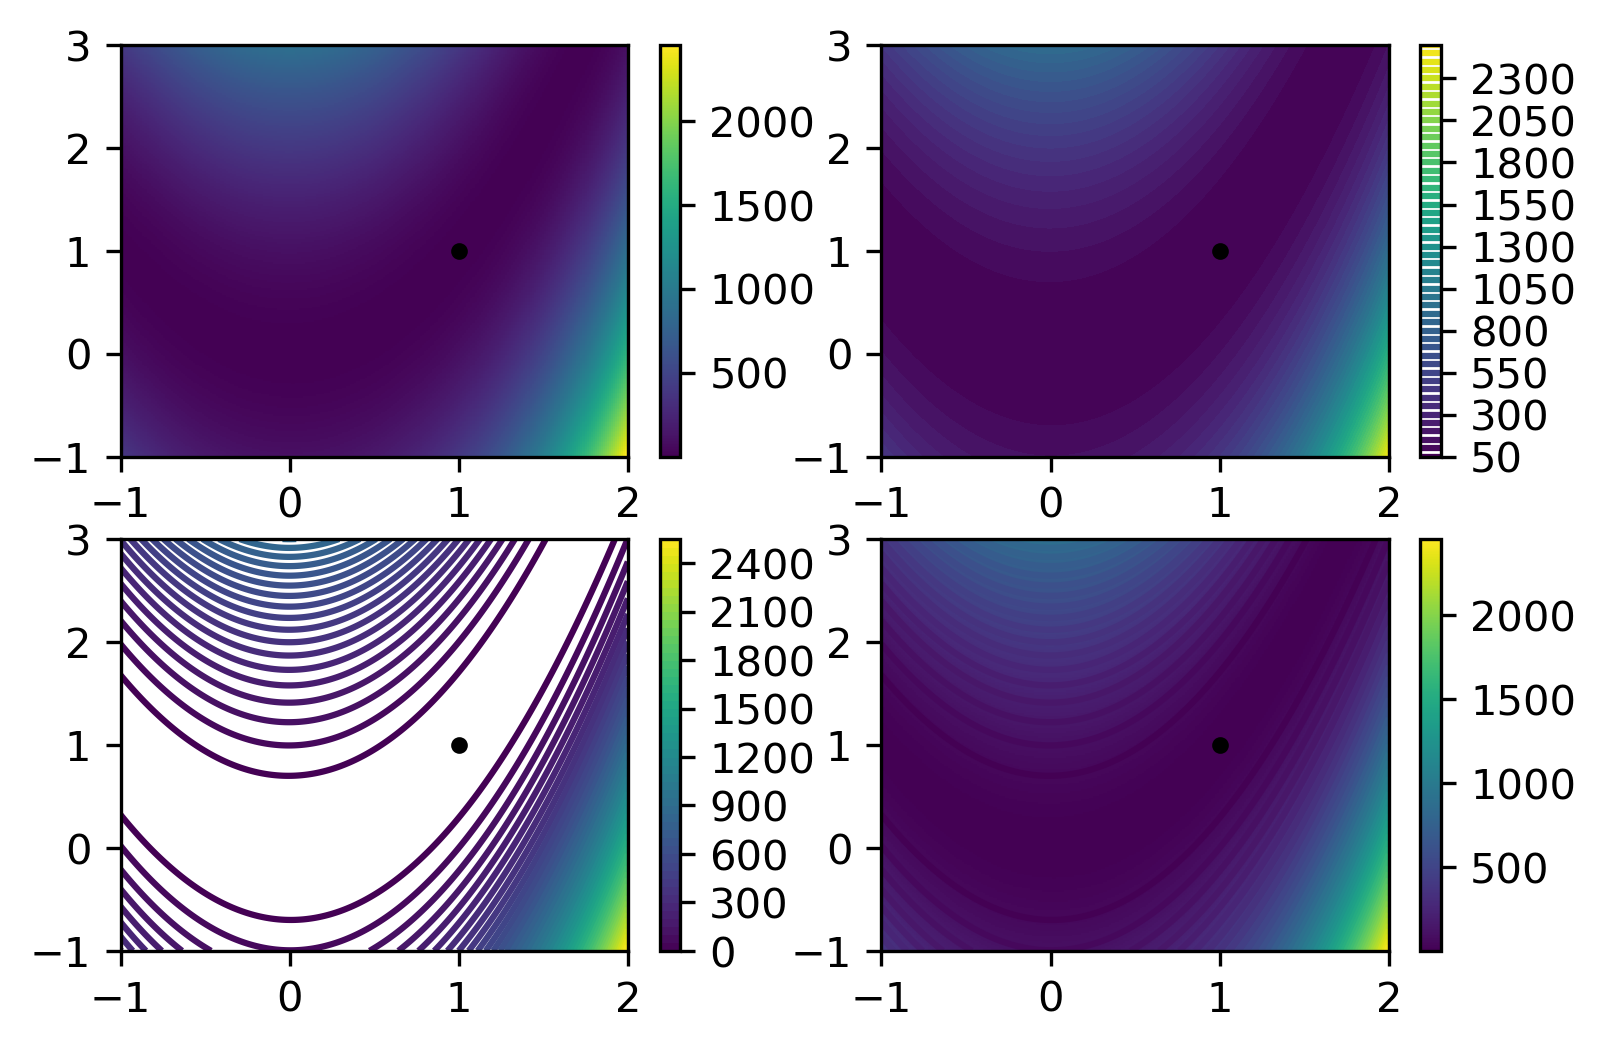

In [115]:
x = np.linspace(-1,2,250)
y = np.linspace(-1,3,250)
X,Y = np.meshgrid(x,y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig,axes = plt.subplots(2,2)
plot1 = axes[0,0].pcolormesh(X,Y,Z,cmap='viridis')
axes[0,0].plot([1],[1],'k.')
plot2 = axes[1,0].contour(X,Y,Z,50,cmap='viridis')
axes[0,1].plot([1],[1],'k.')
plot3 = axes[0,1].contourf(X,Y,Z,50,cmap='viridis')
axes[1,0].plot([1],[1],'k.')
plot4 = axes[1,1].pcolormesh(X,Y,Z,cmap='viridis')
axes[1,1].plot([1],[1],'k.')
axes[1,1].contour(X,Y,Z,50)
fig.colorbar(plot1,ax=axes[0,0])
fig.colorbar(plot2,ax=axes[0,1])
fig.colorbar(plot3,ax=axes[1,0])
fig.colorbar(plot4,ax=axes[1,1])
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

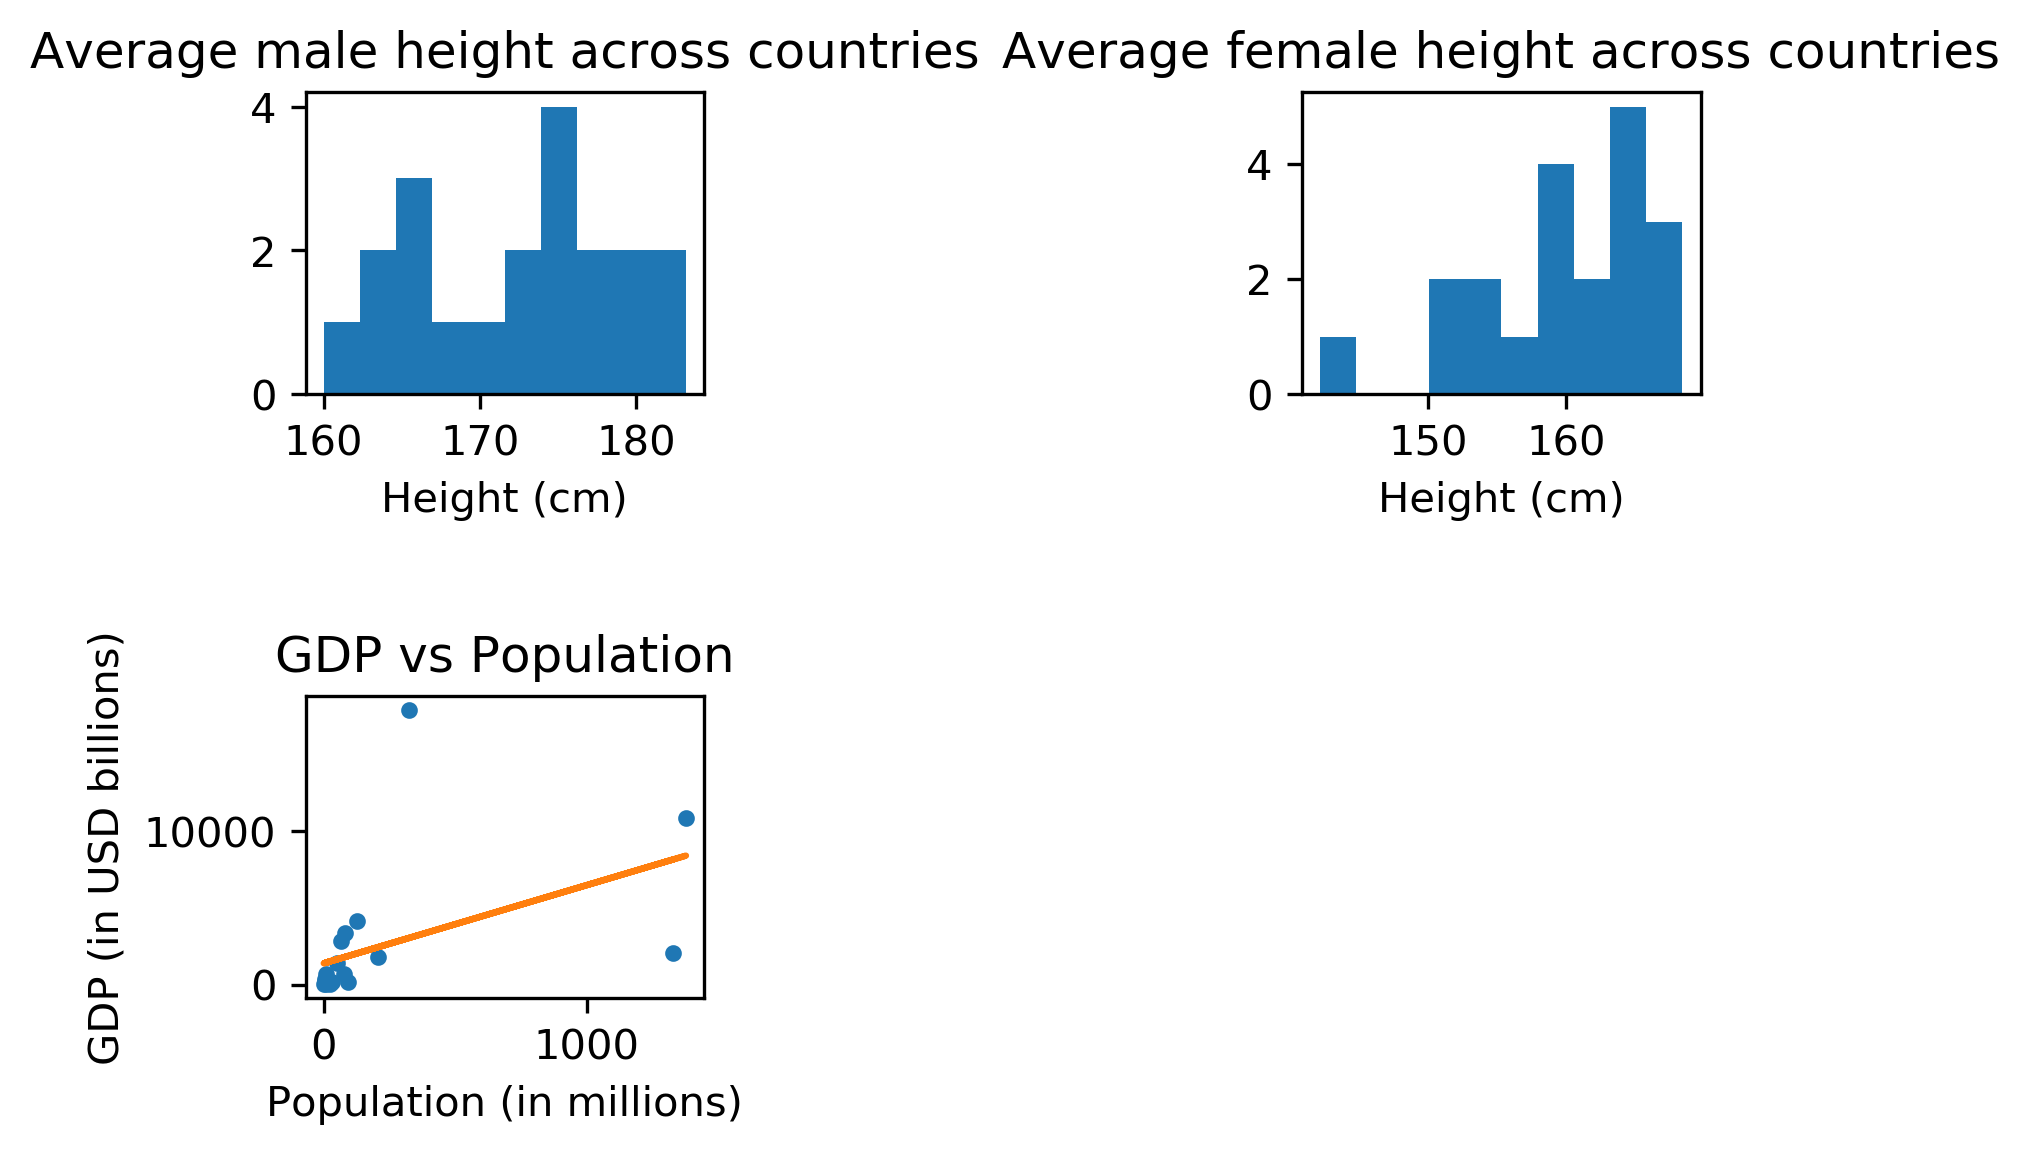

In [145]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T
sortedPopulation = population[np.argsort(population)]
sortedCountries = countries[np.argsort(population)]
sortedGdp = gdp[np.argsort(gdp)]
sortedCountries2 = countries[np.argsort(gdp)]
linregress = spst.linregress(population,gdp)
fig,axes = plt.subplots(2,2)
axes[0,0].hist(male)
axes[0,0].set_xlabel('Height (cm)')
axes[0,0].set_title('Average male height across countries')
axes[0,1].hist(female)
axes[0,1].set_xlabel('Height (cm)')
axes[0,1].set_title('Average female height across countries')
axes[1,0].plot(population,gdp,'.')
axes[1,0].set_xlabel('Population (in millions)')
axes[1,0].set_title('GDP vs Population')
axes[1,0].set_ylabel('GDP (in USD billions)')
axes[1,0].plot(population,linregress[0] * population + linregress[1])
axes[1,1].axis('off')
plt.subplots_adjust(wspace=1.5,hspace=1)
plt.show()


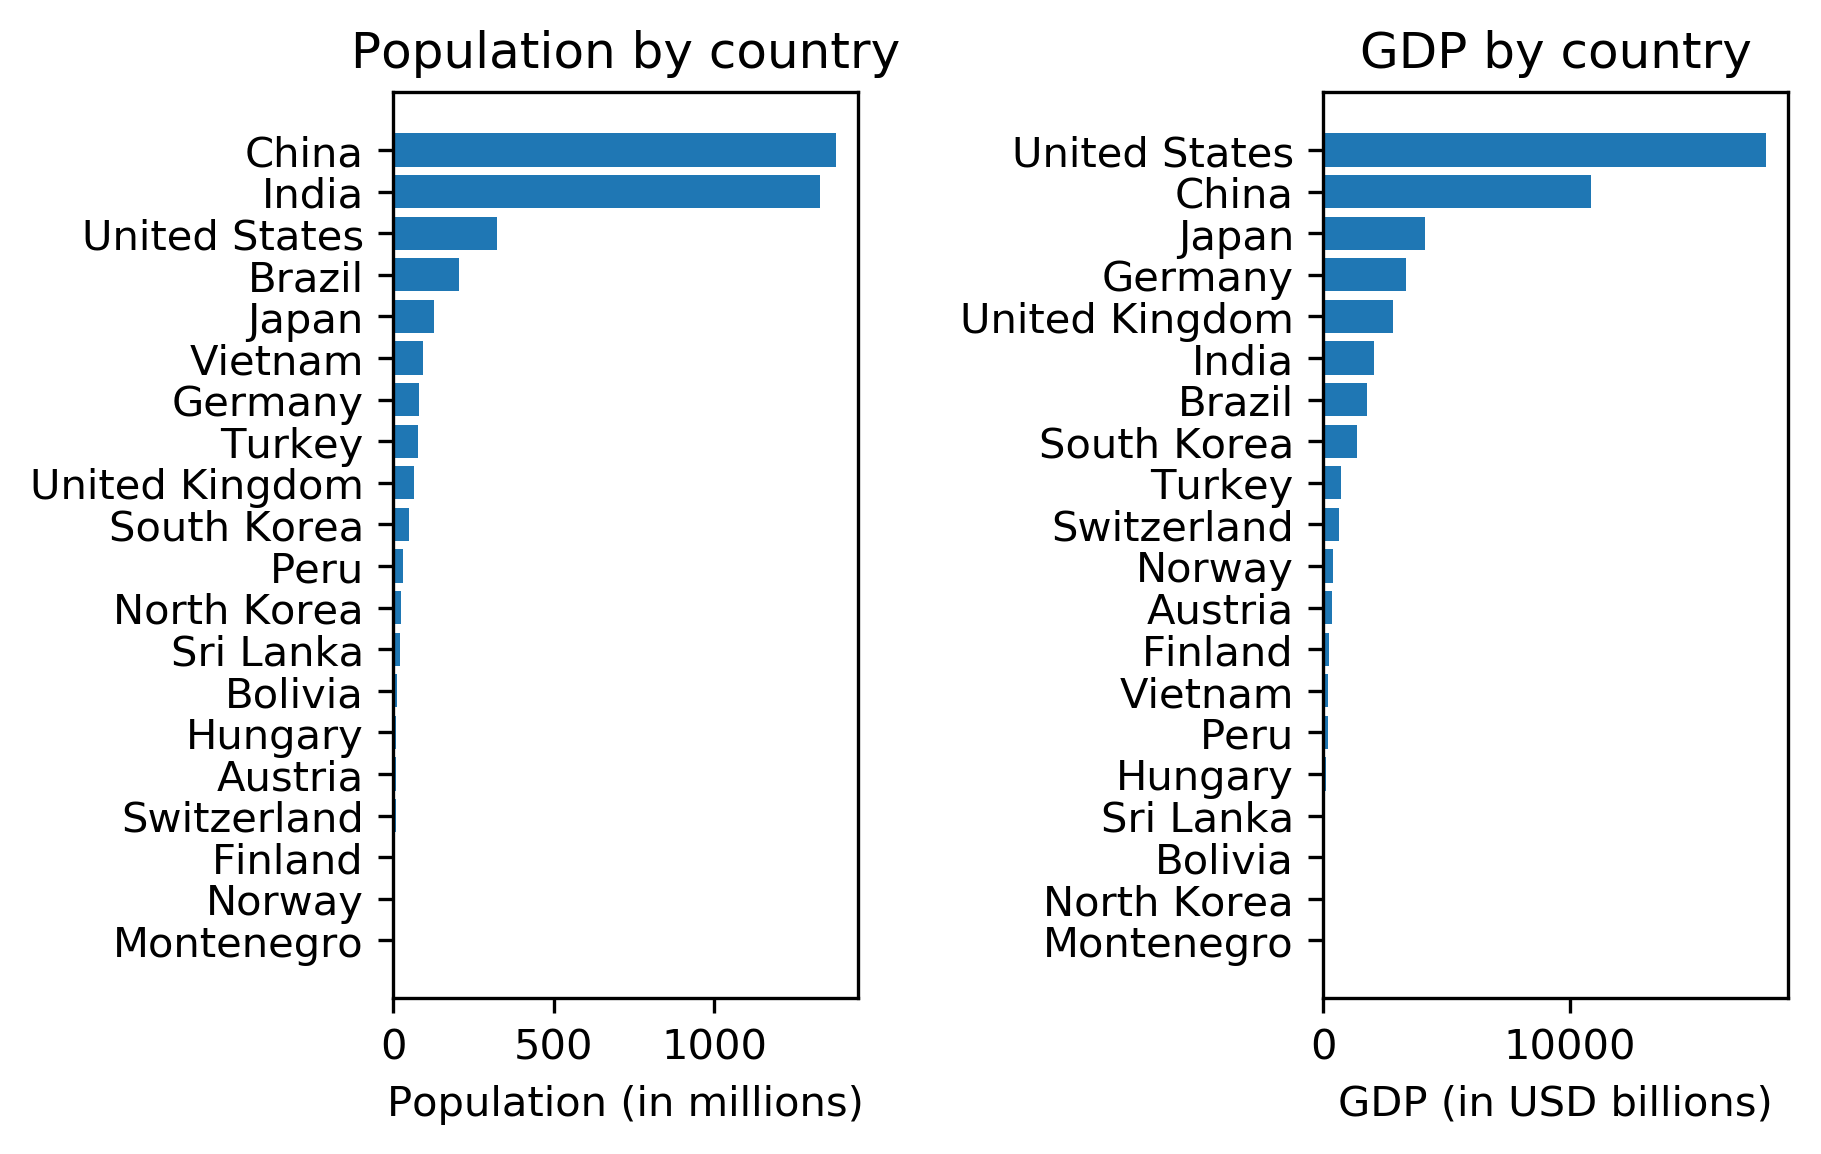

In [146]:
fig,axes = plt.subplots(1,2)
axes[0].barh(sortedCountries,sortedPopulation)
axes[0].set_xlabel('Population (in millions)')
axes[0].set_title('Population by country')
axes[1].barh(sortedCountries2,sortedGdp)
axes[1].set_xlabel('GDP (in USD billions)')
axes[1].set_title('GDP by country')
plt.subplots_adjust(wspace=1,hspace=1)

The historgrams show us the shows us the distribution of female and male heights with all the countries involved to help us get a better idea of how the heights look globally, although our sample size is small.
The scatter plot shows the correlation between population and gdp. The correlation is weak but there is a small regression with a few outliers.
The bar graphs show the populations and gdp by country starting with the highest value.